# segmentation

### 1. 영상분할의 원리

1. $r_i \cap r_j = \varnothing, 1 \leq i, j \leq n, i \neq $
2. $\cup_{i=1,n} r_i = f $
3. $Q(r_i) = 참, 1 \leq i \leq n $
4. $Q(r_i \cup r_j ) = 거짓, 1 \leq i, j \leq n, r_i와 r_j는 이웃한 영역 $

```
1.-> 영역이 서로 겹칠 수 없음

2.-> 모든영역은 전체영상을 덮어야 함

3,4.  -> 같은 영역에 속한 화소는 같은 성질, 이웃한 영역은 서로 다른 성질을 가짐
```

이것은 절대조건은 아니고, 개념적으로 영상분할이 이렇다는 것을 설명하기 위함이다.

너무 세밀하게 분할된 경우는 `과분할`이라고 한다.

`에지`는 개념적으로 영역의 경계와 일치해야 하지만, 여기 책에서 영역 분할은 에지 검출과 다른 방법을 사용한다.

영역이 형성되기 위해서는 완벽한 폐곡선을 이루어야 하는데, 에지는 그렇지 못한 경우가 대다수이며, 이것을 채우기 위해 후처리를 하다가 이상한 곳을 채우게 되는 문제가 발생하기 때문

`특징점`은 한 점을 지칭하기 때문에 혼자로는 어떠한 목적을 달성할 수 없다는 차이가 있다.

### 2. 전통적 방법

일반적인 상황에서는 아주 낮은 성능을 보이지만, 특수한 조건이나 단순한 영상에서 성능이 좋을 때가 있다.

- 임계화를 이용한 영역 분할

```
오츄 알고리즘(과 그 변형)을 이용해 영역을 분할한다.

보통 전역 방법을 이용하지만, 물체의 내부 명암이 다른 경우에는 잘 동작하지 않는 단점이 있다. 그런 경우에는 상황에 따라 임계값을 적응적으로 결정하는 `적응형 임계화`를 사용한다. 영상의 특성에 따라 방법을 정해야 하기 때문에 어렵다.

임계화의 한계를 보완하기 위해 물체가 일정한 형태를 띄는 경우, 물체 모양에 대한 고급 정보를 활용하는 보다 진화한 알고리즘도 있다.
```

- 군집화를 이용한 영역 분할

```
3차원 공간에 떠 있는 점들은 색깔이 비슷할수록 가까이 위치할 것이다 라는 생각으로 분할 실행
     -> 가까이 있는 화소들을 군집화 알고리즘을 이용하여 모은다.
k-means를 이용하여 군집화를 실행하면, 수준이 낮다.
색이 비슷할수록 가까이 위치할 것이라는 전제를 깔고, 화소값만으로 군집화를 했기 때문.
```
> 영역 분할은 화소의 컬러 혹은 명암이 조금 다르더라도 이웃에 있으면 같은 영역으로 배정할 가능성을 갖추어야 한다.

- 분할합병

```
 어떤 연결요소가 영역을 이루는지 판가름하는 규칙이 있다면, 이를 이용하여 분할을 수행할 수 있다.
 Q(r_i)가 거짓이면(여러 화소가 섞여있으면?) r_i를 4등분으로 분할하고 재귀를 반복한다. 과분할된 곳이 많이 생기므로 영역을 다시 합치는 과정을 거친다.
 
 이진 영상인 경우는 Q(.)의 참, 거짓이 명확하지만, 명암이나 컬러 영상인 경우는 딱 맞아 떨어지는 하나의 규칙 Q(.)을 만드는 일은 가능하지 않다.
```      


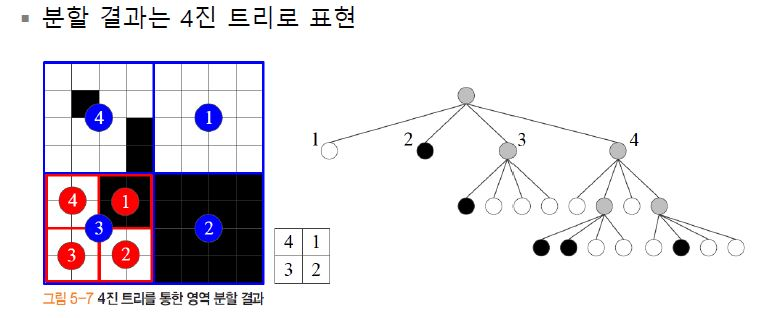


>규칙 $Q(r_i)$가 거짓이면 영역 $r_i$를 4구역으로 분할후 재귀 반복.
$r_i \cup r_j$가 참이면 $r_i$와 $r_j$를 다시 합병

### 3. 그래프 방법

그래프를 사용하는 모든 알고리즘은 유사도가 낮은 에지를 중심으로 분할선을 결정한다. 

그래프 분할 문제를 전역 최적화 문제로 전개했을 때, 

1.어떤 분할의 좋은 정도를 측정하는 목적 함수

2.목적 함수를 최대화 혹은 최소화하는 최적해를 찾는 효율적인 탐색 알고리즘

두 가지 사항을 설계해야 한다. 1번은 분할의 품질을 결정하고, 2번은 속도를 좌우한다.

------

1. 최소 신장트리

```
에지 가중치가 거리인 그래프로 표현하고, 신장트리를 이용해서 최적의 분할을 찾아낸다.
그래프 구성 전, 전처리 단계로 스무딩 연산 진행.
```

2. 정규화 절단

    `Wu의 방법`
```
그래프를 구성할 때 거리 대신 유사도를 에지 가중치로 사용한다.
두 연결요소가 서로 다를수록 좋다. cut(C1, C2)함수는 에지들의 가중치 값을 사용하는, 값이 작을수록 유리한 분할이다.
(C를 두 개의 연결요소 C1, C2로 분할하는 함수)
단점으로는, C1, C2의 크기가 클수록 둘 사이에 에지가 많아지므로 함수의 값도 커진다.
결국 최적이 아닌, 작은 크기의 연결요소로 세밀하게 분할하는 경향을 띄게 된다.
```

    `Shi의 방법`
```
앞서 언급한 cut()함수의 단점을 극복하기 위해, cut()함수를 정규화한다.
유사도를 측정할 때 영상의 특징과 거리를 동시에 사용한다.
```

### 4. 민시프트

`모드탐색` : 어떤 점의 모드를 찾는 문제.

이를 활용하여 어떻게 영상을 분할할지, 모드 탐색 문제를 어떻게 해결할지

1. 군집화

```
점의 소속을 우회적으로 결정.
초기점 y를 y0로 놓고 y0 -> y1, y1 -> y2 ... 이런식으로 찾아가는 방식 사용.
이렇게 움직일 때, 샘플이 많은 쪽으로 움직인다.

이렇게 움직인 점들의 거리가 임계값 이하를 만족하면 수렴했다고 판단한다.
이렇게 찾은 수렴 점들을 군집화하여 대표점으로 통합한다.

민시프트 알고리즘은 가장 진보한 군집화 알고리즘 중 하나이다.
군집의 개수, 모양이 자동으로 정해지고 매개변수가 커널의 폭인 h 하나이다.
```

2. 영상 분할과 스무딩

```
앞서 보았듯이 화소만 가지고 군집화를 시키면 성능이 많이 낮다.
민시프트는 이 문제를 해결하기 위해 컬러 정보 뿐 아니라, 화소 간의 근접성을 같이 이용한다.
3차원 컬러(r,g,b)와 2차원 위치(y,x)를 결합하여 5차원 공간으로 매핑한다.

컬러와 위치가 공간이 다른 스케일을 가지기 때문에, 민시프트에서는 폭이 다른 두 개의 커널 함수의 곱을 사용한다.

영상 분할시 에지 정보를 활용하면 품질을 높일 수 있다. 이러한 관점에서 접근한 민시프트 개선 알고리즘이 있다.
```

### 5. 워터셰드

```
이 설명에서 영상 분할이란, 에지 강도 맵에서 워터셰드를 찾는 과정으로 비유한다.
댐 = 워터셰드 = 영상 분할 경계면을 의미한다.


물이 차면, 바닥부터 물이 차오를 것이고, 수심이 깊지 않은 유역은 범람해서 유역끼리 합쳐질 것이다.
이 때, 범람을 막기 위해 유역 사이에 댐을 건설한다.
물이 최고 수위가 될 때까지 물을 채우면서 댐을 건설한다.
이 때 댐이 분할 경계선이 된다. 영상의 가장자리는 가장 높은 수위(가장 큰 화소값)으로 설정해서 물이 밖으로 흐르는 것을 방지한다.

반드시 폐곡선만 생긴다는 장점과,
지역 최저점이 너무 많아(잡음) 심하게 과분할되는 근본적인 문제점이 존재한다.

워터셰드로 과분할시킨 뒤에, 각 영역을 다른 영상 분할 알고리즘의 초기 입력으로 사용하기도 한다.
```

### 6. 대화식 물체 분할

1. 능동 외곽선 - 초기 곡선에서 시작해서 최적 상태를 능동적으로 찾아감.

`스네이크 알고리즘`

```
최초의 능동 외곽선 기법이다.

E = E(internal) + E(image) + E(constraint)
E(internal) : 잡음에 고정되는 것을 방지한다. 곡선의 내부 에너지를 나타내는 측정치이고, 곡선 모양을 조절한다. 매끄러운 곡선을 선호한다.
E(image) : 영상의 명암값에 반응하는 에너지 항이다. 곡선이 놓인 곳의 에지 강도를 사용한다.
E(constraint) : 사용자가 원하는 모양을 지정할 시, 그것을 반영한다.

초기 곡선에서 시작하여, 에너지가 낮은 곳을 찾아가다가 임계값 이하면 수렴한다.
```

`지능가위와 레벨 셋`
```
스네이크보다 진보한 현대적인 기법이다
```

2. 그래프 절단

```
영상의 화소를 노드로 간주하고, 유사도를 에지 가중치로 설정하여 그래프로 변환시킨다.

그래프 절단을 할 때, 가장 좋은 절단은 최소 그래프 절단이다. (가중치가 최소)
최소 절단은 그래프의 최대 흐름을 찾는 것과 동일하다. (Ford의 정리)
최소절단 결과, 화소들은 물체 혹은 배경(사용자가 지정)에 속한다.
내부에 구멍이 뚫린 영역 등도 처리 가능하다. (스네이크보다 강점이다)
```


-------------

_책 : 한빛아카데미 컴퓨터비전_

_정리하다가 찾은 블로그. 같은 내용인데 정리 더 잘되있다:_ <https://brunch.co.kr/@happysmile/5>